<a href="https://colab.research.google.com/github/extreme4all/Python_Tensorflow_Learning/blob/master/Linear_Regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required to save models in YAML format
!pip install -q pyyaml  

In [35]:
import numpy as np 
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt 
print('Numpy version:',np.version.version)
print('Tensorflow version:',tf.VERSION)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.14.6
Tensorflow version: 1.13.1
Matplotlib version: 3.0.2


In [0]:
# Setting seeds
np.random.seed(101) 
tf.set_random_seed(101) 

In [42]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 

# Number of data points 
n = len(x) 

# visual
print(x[:10])
print('##########')
print(y[:10])

[ 1.07017709 -0.19094767  2.50648775  5.50889096  7.72424414  6.08752975
  2.6755118   6.48412783  6.29033327 11.4094322 ]
##########
[-2.02384708 -2.18472242  1.26127131 -0.22760583  0.20221889  8.8149185
  2.264383    3.27146831  4.91239672 10.80944939]


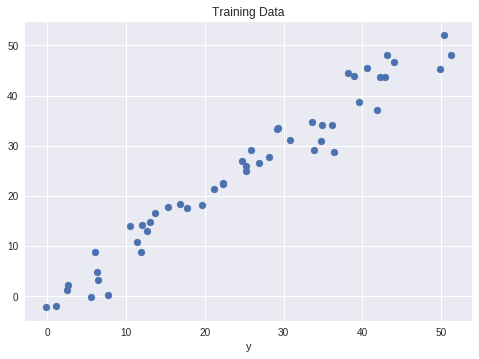

In [43]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
# Creating model by defining placeholders to feed into optimizer
X = tf.placeholder("float") 
Y = tf.placeholder("float")

# two trainable Tensorflow Variables for the weights and Bias
W = tf.Variable(np.random.randn(), name = "W") # Weight
b = tf.Variable(np.random.randn(), name = "b") # Bias

# Hyper parameters for the model
learning_rate = 0.01
training_epochs = 1000

In [0]:
# Hypothesis
# Prediction_Y =parameter_X * weight + Bias
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [48]:

# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": Cost =", c, "Weight =", sess.run(W), "Bias =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 



Epoch 50 : cost = 5.6523485 W = 0.99961 b = -1.0619944
Epoch 100 : cost = 5.62167 W = 0.99794495 b = -0.97969544
Epoch 150 : cost = 5.596082 W = 0.99645156 b = -0.9058785
Epoch 200 : cost = 5.574684 W = 0.99511206 b = -0.8396685
Epoch 250 : cost = 5.556744 W = 0.99391055 b = -0.78028303
Epoch 300 : cost = 5.5416546 W = 0.99283296 b = -0.72701854
Epoch 350 : cost = 5.5289283 W = 0.9918664 b = -0.6792434
Epoch 400 : cost = 5.518165 W = 0.9909995 b = -0.636393
Epoch 450 : cost = 5.509035 W = 0.9902219 b = -0.59795904
Epoch 500 : cost = 5.501265 W = 0.9895245 b = -0.5634855
Epoch 550 : cost = 5.494635 W = 0.988899 b = -0.5325667
Epoch 600 : cost = 5.4889636 W = 0.98833793 b = -0.50483567
Epoch 650 : cost = 5.484092 W = 0.9878347 b = -0.4799614
Epoch 700 : cost = 5.4799004 W = 0.98738337 b = -0.45765093
Epoch 750 : cost = 5.476286 W = 0.9869785 b = -0.43764046
Epoch 800 : cost = 5.473152 W = 0.9866154 b = -0.41969275
Epoch 850 : cost = 5.4704375 W = 0.9862897 b = -0.4035939
Epoch 900 : cost

Training cost = 5.4642167 Weight = 0.9855006 bias = -0.36458778 



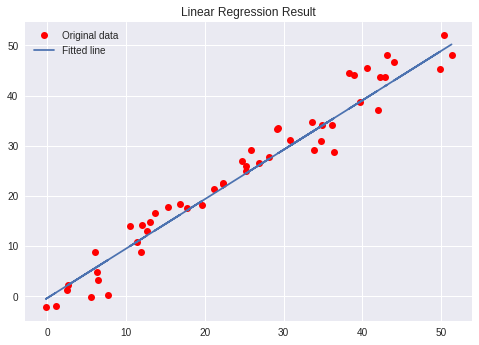

In [50]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
